In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthesis1/synthetic_usb_dataset_7000-1 (1).csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/synthesis1/synthetic_usb_dataset_7000-1 (1).csv')
df.head()


,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,cpu_avg_percent,process_count,avg_process_runtime_sec,...,sectors_per_track,bytes_per_sector,sector_count,drive_model,drive_interface,removable_drive,source_data_size_MB,keystroke_mean_ms,keystroke_std_ms,label
0,USB Mass Storage Device,2e8a,000a,Arduino,USB\ROOT_HUB#3897,12 Mbps,302,14.838413,39,1892.883542,...,0.977465,505.505595,2025.041956,Generic Flash Disk,USB,TRUE,1.452055,32.256998,39.730903,1
1,USB Mass Storage Device,1058,6387,HP,USB\ROOT_HUB#6388,5 Gbps,235,18.680961,65,11611.363060,...,0.975494,508.402335,2052.913219,SD Card Reader,USB,TRUE,1.224408,-1.191913,-0.631436,0
2,USB Input Device,16c0,c31c,HP,USB\ROOT_HUB#7103,12 Mbps,162,4.641624,57,-89.091813,...,-0.970243,-7.799536,-60.612247,Unknown,Unknown,Unknown,-1.010006,33.742490,19.635419,1
3,USB Mass Storage Device,058f,000a,Logitech,USB\ROOT_HUB#4223,12 Mbps,88,19.058356,44,-105.827810,...,1.004994,502.555282,1409.714639,Raspberry Pi Pico,USB,True,0.901491,32.023018,44.997138,1
4,USB Input Device,046d,c077,Raspberry Pi,USB\ROOT_HUB#3013,480 Mbps,178,17.318755,52,5427.013770,...,-0.995541,-13.411897,-56.287301,Unknown,Unknown,Unknown,-1.041743,-0.901407,-0.086591,0


In [3]:
df.columns

Index(['device_description', 'vendor_id', 'product_id', 'manufacturer',
       'location_id', 'usb_speed', 'power_mA', 'cpu_avg_percent',
       'process_count', 'avg_process_runtime_sec', 'ftk_available',
       'alt_usb_descriptor', 'source_type', 'cylinders', 'tracks_per_cylinder',
       'sectors_per_track', 'bytes_per_sector', 'sector_count', 'drive_model',
       'drive_interface', 'removable_drive', 'source_data_size_MB',
       'keystroke_mean_ms', 'keystroke_std_ms', 'label'],
      dtype='object')

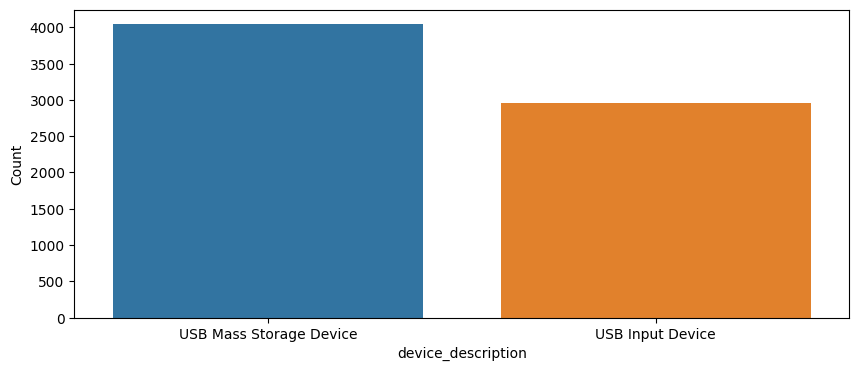

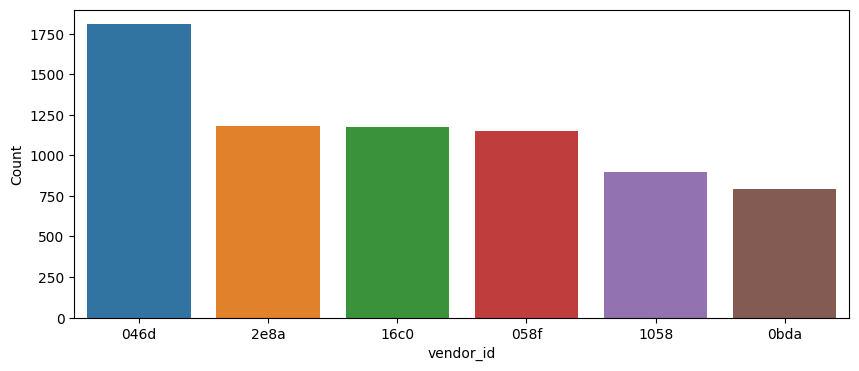

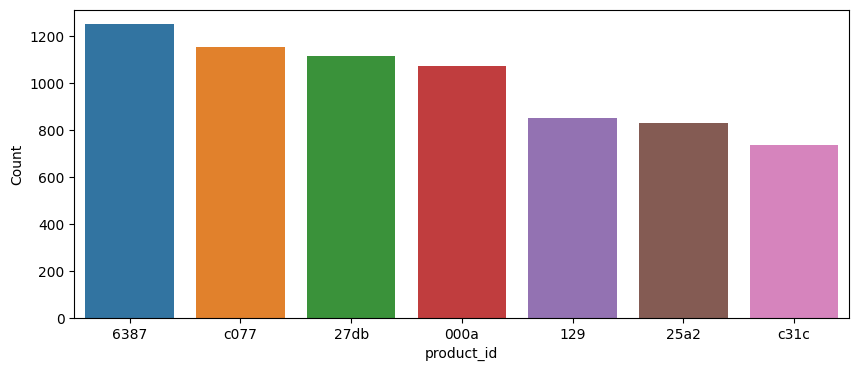

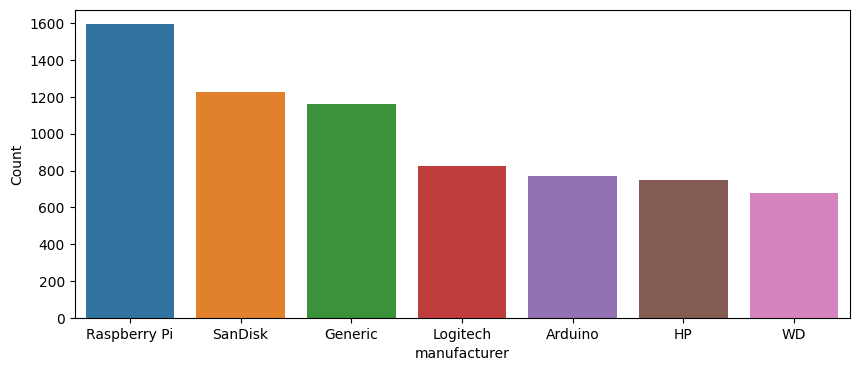

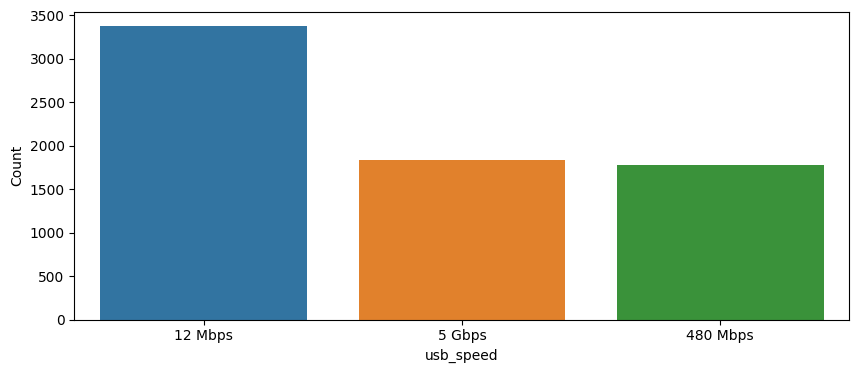

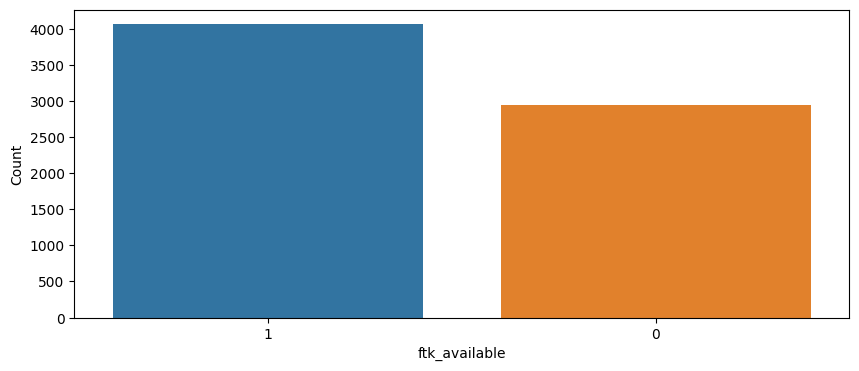

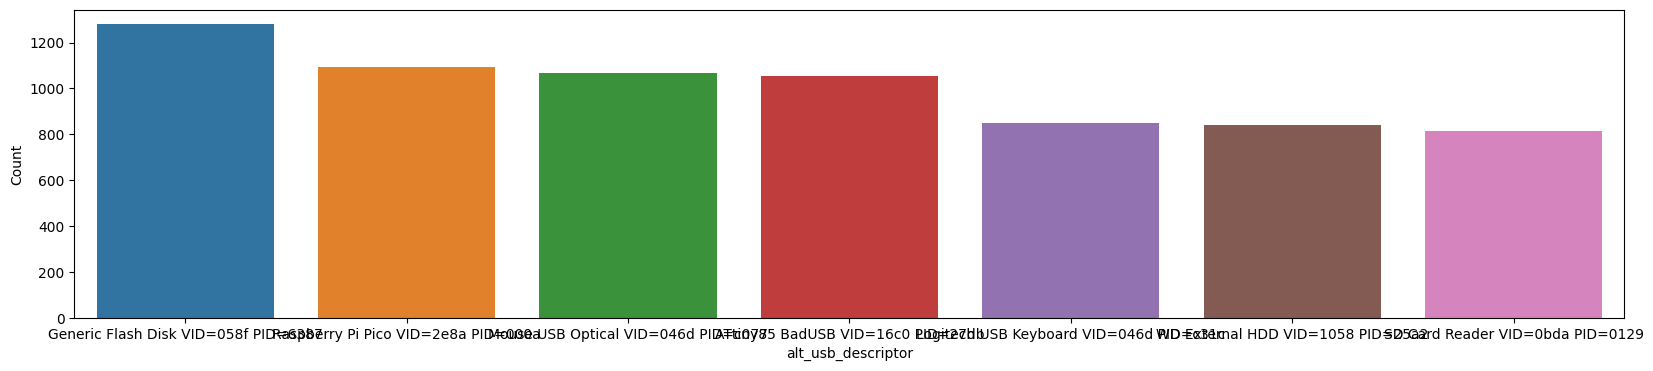

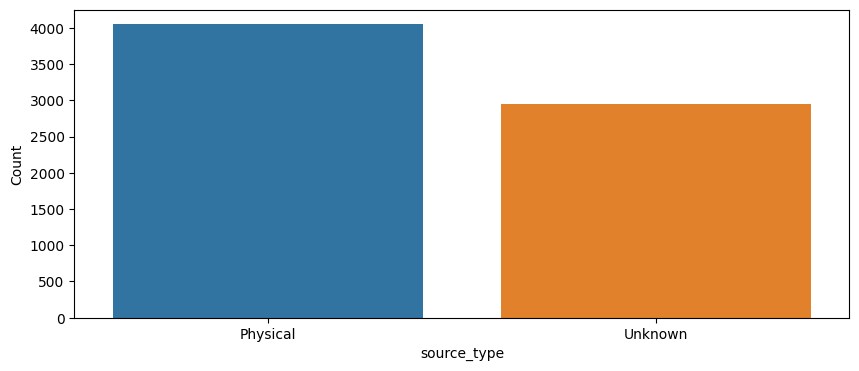

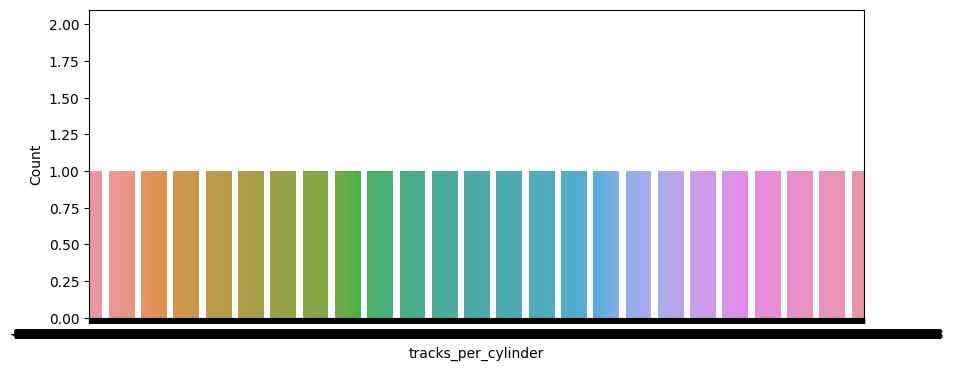

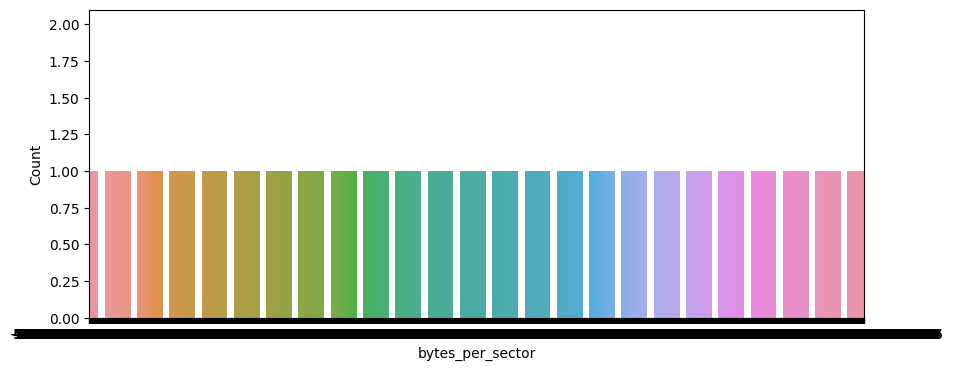

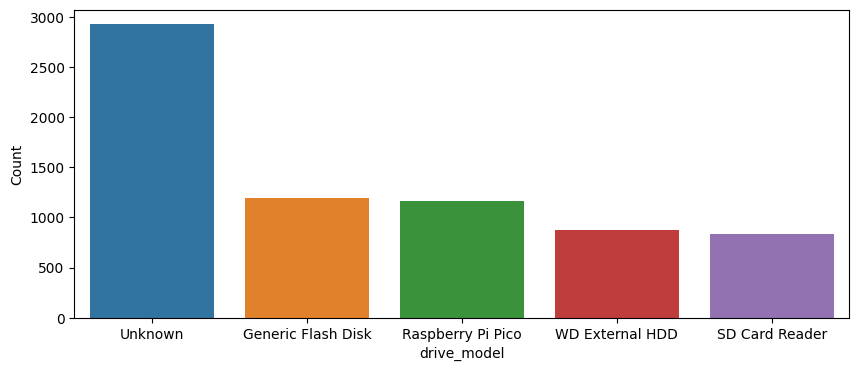

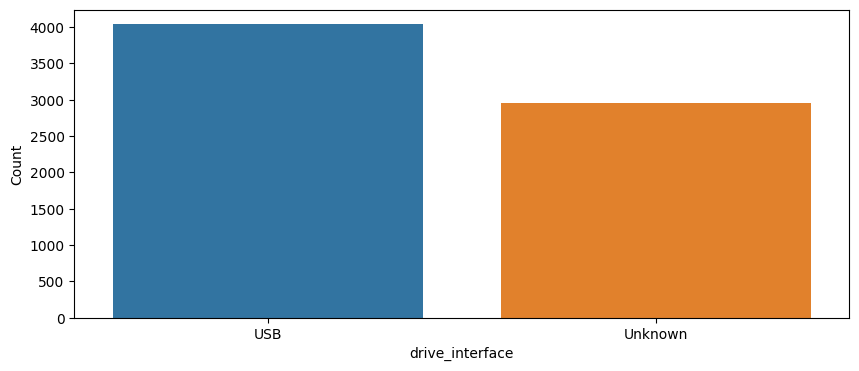

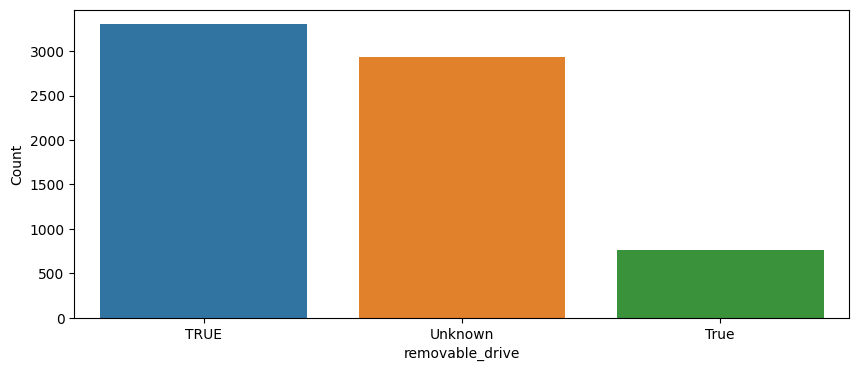

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.countplot(x=df['device_description'], order=df['device_description'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("device_description")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['vendor_id'], order=df['vendor_id'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("vendor_id")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x=df['product_id'], order=df['product_id'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("product_id")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['manufacturer'], order=df['manufacturer'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("manufacturer")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['usb_speed'], order=df['usb_speed'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("usb_speed")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['ftk_available'], order=df['ftk_available'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("ftk_available")
plt.show()

plt.figure(figsize=(20,4))
sns.countplot(x=df['alt_usb_descriptor'], order=df['alt_usb_descriptor'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("alt_usb_descriptor")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['source_type'], order=df['source_type'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("source_type")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['tracks_per_cylinder'], order=df['tracks_per_cylinder'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("tracks_per_cylinder")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['bytes_per_sector'], order=df['bytes_per_sector'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("bytes_per_sector")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['drive_model'], order=df['drive_model'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("drive_model")
plt.show()



plt.figure(figsize=(10,4))
sns.countplot(x=df['drive_interface'], order=df['drive_interface'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("drive_interface")
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x=df['removable_drive'], order=df['removable_drive'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("removable_drive")
plt.show()

In [5]:
import pandas as pd
from scipy.stats import pointbiserialr

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('label')
corrs = {}

for col in numeric_cols:
    corr, pval = pointbiserialr(df[col].fillna(0), df['label'])
    corrs[col] = corr

corr_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Correlation'])
print(corr_df.sort_values('Correlation', key=abs, ascending=False))


                         Correlation
keystroke_std_ms            0.480712
avg_process_runtime_sec    -0.406956
power_mA                   -0.405315
keystroke_mean_ms           0.307896
source_data_size_MB         0.174413
sectors_per_track           0.153011
ftk_available               0.152525
bytes_per_sector            0.147256
tracks_per_cylinder         0.145782
process_count              -0.118039
cylinders                   0.091933
cpu_avg_percent             0.061523
sector_count                0.002529


In [6]:
# ✅ keystroke_std_ms

# ✅ avg_process_runtime_sec

# ✅ power_mA

# ✅ keystroke_mean_ms

In [7]:
import scipy.stats as stats

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    table = pd.crosstab(df[col], df['label'])
    chi2, p, dof, ex = stats.chi2_contingency(table)
    print(f"{col}: chi2={chi2:.2f}, p={p:.4f}")


device_description: chi2=172.50, p=0.0000
vendor_id: chi2=3282.77, p=0.0000
product_id: chi2=3048.18, p=0.0000
manufacturer: chi2=117.96, p=0.0000
location_id: chi2=1501.86, p=0.0000
usb_speed: chi2=1576.88, p=0.0000
alt_usb_descriptor: chi2=3186.76, p=0.0000
source_type: chi2=160.30, p=0.0000
drive_model: chi2=2456.41, p=0.0000
drive_interface: chi2=162.70, p=0.0000
removable_drive: chi2=950.44, p=0.0000


In [8]:
# Feature	χ² value	Importance
# vendor_id	3282.77	Extremely strong
# alt_usb_descriptor	3186.76	Extremely strong
# product_id	3048.18	Extremely strong
# drive_model	2456.41	Very strong
# location_id	1501.86	Strong
# usb_speed	1576.88	Strong
# removable_drive	950.44	Strong
# device_description	172.50	Moderate
# source_type	160.30	Moderate
# drive_interface	162.70	Moderate
# manufacturer	117.96	Moderate

In [9]:
df1= df

In [10]:
df1 = df1.drop(columns=["cylinders", "cpu_avg_percent","sector_count","source_data_size_MB","sectors_per_track","ftk_available", "bytes_per_sector", "tracks_per_cylinder", "process_count" ])

In [11]:
df1.head()

,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,avg_process_runtime_sec,alt_usb_descriptor,source_type,drive_model,drive_interface,removable_drive,keystroke_mean_ms,keystroke_std_ms,label
0,USB Mass Storage Device,2e8a,000a,Arduino,USB\ROOT_HUB#3897,12 Mbps,302,1892.883542,Raspberry Pi Pico VID=2e8a PID=000a,Physical,Generic Flash Disk,USB,TRUE,32.256998,39.730903,1
1,USB Mass Storage Device,1058,6387,HP,USB\ROOT_HUB#6388,5 Gbps,235,11611.363060,Generic Flash Disk VID=058f PID=6387,Physical,SD Card Reader,USB,TRUE,-1.191913,-0.631436,0
2,USB Input Device,16c0,c31c,HP,USB\ROOT_HUB#7103,12 Mbps,162,-89.091813,ATtiny85 BadUSB VID=16c0 PID=27db,Unknown,Unknown,Unknown,Unknown,33.742490,19.635419,1
3,USB Mass Storage Device,058f,000a,Logitech,USB\ROOT_HUB#4223,12 Mbps,88,-105.827810,Generic Flash Disk VID=058f PID=6387,Physical,Raspberry Pi Pico,USB,True,32.023018,44.997138,1
4,USB Input Device,046d,c077,Raspberry Pi,USB\ROOT_HUB#3013,480 Mbps,178,5427.013770,Mouse USB Optical VID=046d PID=c077,Unknown,Unknown,Unknown,Unknown,-0.901407,-0.086591,0


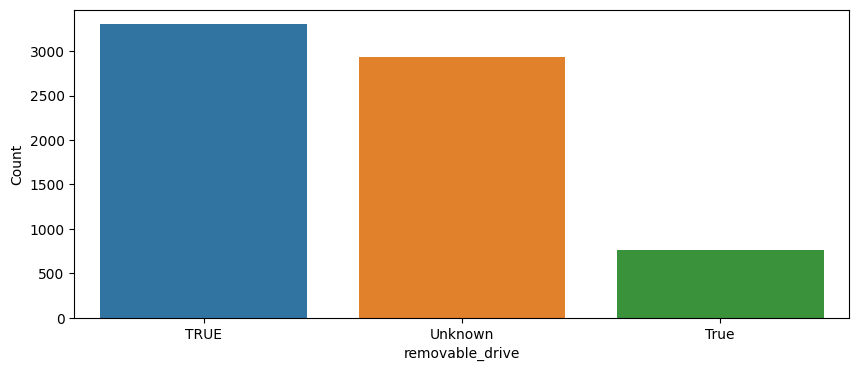

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(x=df1['removable_drive'], order=df1['removable_drive'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("removable_drive")
plt.show()

In [13]:
df1["removable_drive"] = df1["removable_drive"].str.upper()

In [14]:
df1.isnull().sum()

device_description         0
vendor_id                  0
product_id                 0
manufacturer               0
location_id                0
usb_speed                  0
power_mA                   0
avg_process_runtime_sec    0
alt_usb_descriptor         0
source_type                0
drive_model                0
drive_interface            0
removable_drive            0
keystroke_mean_ms          0
keystroke_std_ms           0
label                      0
dtype: int64

In [15]:
df1['keystroke_mean_ms'] = df1['keystroke_mean_ms'].replace("Null", 0).astype(float)
df1['keystroke_std_ms']  = df1['keystroke_std_ms'].replace("Null", 0).astype(float)

In [16]:
df1.isnull().sum()

device_description         0
vendor_id                  0
product_id                 0
manufacturer               0
location_id                0
usb_speed                  0
power_mA                   0
avg_process_runtime_sec    0
alt_usb_descriptor         0
source_type                0
drive_model                0
drive_interface            0
removable_drive            0
keystroke_mean_ms          0
keystroke_std_ms           0
label                      0
dtype: int64

In [17]:
df1.head()

,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,avg_process_runtime_sec,alt_usb_descriptor,source_type,drive_model,drive_interface,removable_drive,keystroke_mean_ms,keystroke_std_ms,label
0,USB Mass Storage Device,2e8a,000a,Arduino,USB\ROOT_HUB#3897,12 Mbps,302,1892.883542,Raspberry Pi Pico VID=2e8a PID=000a,Physical,Generic Flash Disk,USB,TRUE,32.256998,39.730903,1
1,USB Mass Storage Device,1058,6387,HP,USB\ROOT_HUB#6388,5 Gbps,235,11611.363060,Generic Flash Disk VID=058f PID=6387,Physical,SD Card Reader,USB,TRUE,-1.191913,-0.631436,0
2,USB Input Device,16c0,c31c,HP,USB\ROOT_HUB#7103,12 Mbps,162,-89.091813,ATtiny85 BadUSB VID=16c0 PID=27db,Unknown,Unknown,Unknown,UNKNOWN,33.742490,19.635419,1
3,USB Mass Storage Device,058f,000a,Logitech,USB\ROOT_HUB#4223,12 Mbps,88,-105.827810,Generic Flash Disk VID=058f PID=6387,Physical,Raspberry Pi Pico,USB,TRUE,32.023018,44.997138,1
4,USB Input Device,046d,c077,Raspberry Pi,USB\ROOT_HUB#3013,480 Mbps,178,5427.013770,Mouse USB Optical VID=046d PID=c077,Unknown,Unknown,Unknown,UNKNOWN,-0.901407,-0.086591,0


In [18]:
import scipy.stats as stats

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    table = pd.crosstab(df[col], df['label'])
    chi2, p, dof, ex = stats.chi2_contingency(table)
    print(f"{col}: chi2={chi2:.2f}, p={p:.4f}")


device_description: chi2=172.50, p=0.0000
vendor_id: chi2=3282.77, p=0.0000
product_id: chi2=3048.18, p=0.0000
manufacturer: chi2=117.96, p=0.0000
location_id: chi2=1501.86, p=0.0000
usb_speed: chi2=1576.88, p=0.0000
alt_usb_descriptor: chi2=3186.76, p=0.0000
source_type: chi2=160.30, p=0.0000
drive_model: chi2=2456.41, p=0.0000
drive_interface: chi2=162.70, p=0.0000
removable_drive: chi2=950.44, p=0.0000


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [20]:
df1['alt_usb_descriptor'] = le.fit_transform(df1['alt_usb_descriptor'])
df1['source_type'] = le.fit_transform(df1['source_type'])
df1['location_id'] = le.fit_transform(df1['location_id'])
df1['device_description'] = le.fit_transform(df1['device_description'])
df1['product_id'] = le.fit_transform(df1['product_id'])
df1['drive_model'] = le.fit_transform(df1['drive_model'])
df1['drive_interface'] = le.fit_transform(df1['drive_interface'])
df1['removable_drive'] = le.fit_transform(df1['removable_drive'])
df1['vendor_id'] = le.fit_transform(df1['vendor_id'])
df1['manufacturer'] = le.fit_transform(df1['manufacturer'])
df1['usb_speed'] = le.fit_transform(df1['usb_speed'])


In [21]:
df1.head()

,device_description,vendor_id,product_id,manufacturer,location_id,usb_speed,power_mA,avg_process_runtime_sec,alt_usb_descriptor,source_type,drive_model,drive_interface,removable_drive,keystroke_mean_ms,keystroke_std_ms,label
0,1,5,0,0,377,0,302,1892.883542,4,0,0,0,0,32.256998,39.730903,1
1,1,3,4,2,696,2,235,11611.363060,1,0,2,0,0,-1.191913,-0.631436,0
2,0,4,6,2,807,0,162,-89.091813,0,1,3,1,1,33.742490,19.635419,1
3,1,1,0,3,423,0,88,-105.827810,1,0,1,0,0,32.023018,44.997138,1
4,0,0,5,4,259,1,178,5427.013770,3,1,3,1,1,-0.901407,-0.086591,0


label                      1.000000
keystroke_std_ms           0.480712
vendor_id                  0.405961
keystroke_mean_ms          0.307896
device_description         0.157271
manufacturer               0.025215
location_id                0.017254
removable_drive           -0.142777
source_type               -0.151619
drive_interface           -0.152750
product_id                -0.224535
alt_usb_descriptor        -0.334586
power_mA                  -0.405315
avg_process_runtime_sec   -0.406956
drive_model               -0.467085
usb_speed                 -0.473347
Name: label, dtype: float64


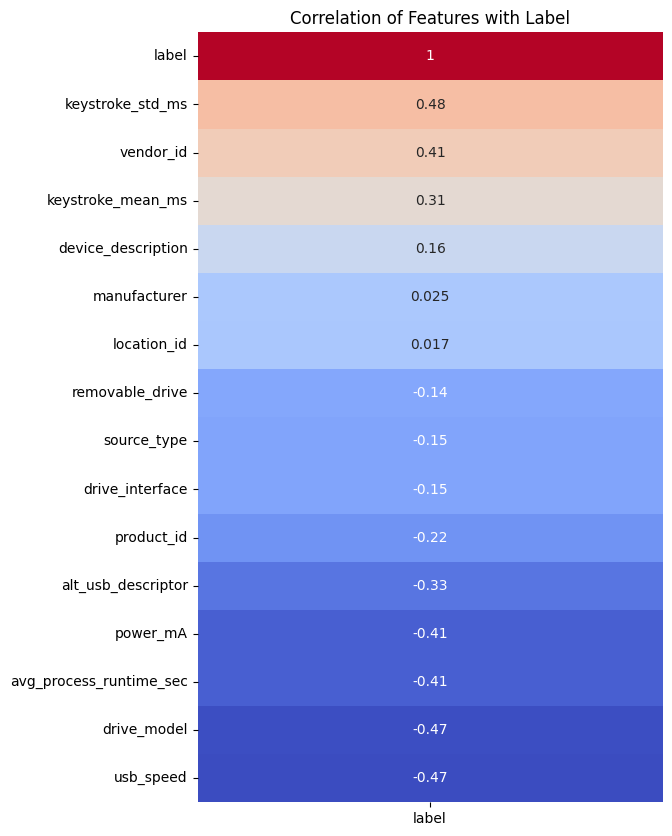

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr_matrix = df1.corr(numeric_only=True)

# show only correlation with label
label_corr = corr_matrix['label'].sort_values(ascending=False)
print(label_corr)

# visualize
plt.figure(figsize=(6,10))
sns.heatmap(label_corr.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Label")
plt.show()


In [23]:
df1.to_csv('/kaggle/working/df1.csv', index=False)


In [24]:
df1.isnull().sum()

device_description         0
vendor_id                  0
product_id                 0
manufacturer               0
location_id                0
usb_speed                  0
power_mA                   0
avg_process_runtime_sec    0
alt_usb_descriptor         0
source_type                0
drive_model                0
drive_interface            0
removable_drive            0
keystroke_mean_ms          0
keystroke_std_ms           0
label                      0
dtype: int64

In [25]:
import pandas as pd
import numpy as np

# Assume df is your dataset (without preprocessing)
# Drop label if present
numeric_cols = df1.select_dtypes(include=[np.number]).columns.drop('label', errors='ignore')

# Compute skewness
skewness = df1[numeric_cols].skew(numeric_only=True)

# Classify columns based on skewness
skewed_cols   = skewness[(abs(skewness) > 1) & (df1[numeric_cols].min() >= 0).all()].index.tolist()
robust_cols   = skewness[(abs(skewness) > 0.75) & (abs(skewness) <= 1)].index.tolist()
standard_cols = skewness[(abs(skewness) <= 0.75)].index.tolist()

print("Skewness values:")
print(skewness.sort_values(ascending=False))
print("\nRecommended scaling groups:")
print("log1p + RobustScaler (heavily skewed):", skewed_cols)
print("RobustScaler (moderately skewed):", robust_cols)
print("StandardScaler (symmetric):", standard_cols)


Skewness values:
keystroke_mean_ms          1.080809
keystroke_std_ms           0.870837
power_mA                   0.516896
usb_speed                  0.429130
avg_process_runtime_sec    0.406736
removable_drive            0.326623
source_type                0.316528
drive_interface            0.312378
vendor_id                  0.125451
alt_usb_descriptor         0.117794
location_id               -0.053633
product_id                -0.124816
manufacturer              -0.183354
device_description        -0.314156
drive_model               -0.414712
dtype: float64

Recommended scaling groups:
log1p + RobustScaler (heavily skewed): []
RobustScaler (moderately skewed): ['keystroke_std_ms']
StandardScaler (symmetric): ['device_description', 'vendor_id', 'product_id', 'manufacturer', 'location_id', 'usb_speed', 'power_mA', 'avg_process_runtime_sec', 'alt_usb_descriptor', 'source_type', 'drive_model', 'drive_interface', 'removable_drive']


In [26]:
df1.isnull().sum()

device_description         0
vendor_id                  0
product_id                 0
manufacturer               0
location_id                0
usb_speed                  0
power_mA                   0
avg_process_runtime_sec    0
alt_usb_descriptor         0
source_type                0
drive_model                0
drive_interface            0
removable_drive            0
keystroke_mean_ms          0
keystroke_std_ms           0
label                      0
dtype: int64

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

# Continuous columns
log_robust_cols = ["keystroke_mean_ms"]         # heavily skewed
robust_cols     = ["keystroke_std_ms"]          # moderately skewed
standard_cols   = ["power_mA", "usb_speed", "avg_process_runtime_sec"]

# Fix negatives, then log1p + RobustScaler
df1[log_robust_cols] = df1[log_robust_cols].clip(lower=0)
df1[log_robust_cols] = np.log1p(df1[log_robust_cols])
df1[log_robust_cols] = RobustScaler().fit_transform(df1[log_robust_cols])

# Apply RobustScaler
df1[robust_cols] = RobustScaler().fit_transform(df1[robust_cols])

# Apply StandardScaler
df1[standard_cols] = StandardScaler().fit_transform(df1[standard_cols])

# Check nulls again
print(df1.isna().sum())


device_description         0
vendor_id                  0
product_id                 0
manufacturer               0
location_id                0
usb_speed                  0
power_mA                   0
avg_process_runtime_sec    0
alt_usb_descriptor         0
source_type                0
drive_model                0
drive_interface            0
removable_drive            0
keystroke_mean_ms          0
keystroke_std_ms           0
label                      0
dtype: int64


In [37]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['label'])
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [38]:
print("Scaled train shape:", X_train.shape)
print("Scaled test shape:", X_test.shape)

Scaled train shape: (5600, 15)
Scaled test shape: (1400, 15)


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# Define Logistic Regression model
logreg = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=10000,
    class_weight='balanced',   # handles imbalance in your dataset
    n_jobs=-1,
    random_state=42
)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred  = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Extra metrics
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print(f"Logistic Regression — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Logistic Regression — Accuracy: 0.8707
Precision: 0.8362, Recall: 0.8709, F1: 0.8532, ROC-AUC: 0.9370

Classification Report:
               precision    recall  f1-score   support

           0     0.8988    0.8706    0.8845       796
           1     0.8362    0.8709    0.8532       604

    accuracy                         0.8707      1400
   macro avg     0.8675    0.8707    0.8688      1400
weighted avg     0.8718    0.8707    0.8710      1400



In [53]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Train-set predictions
y_pred_tr  = logreg.predict(X_train)
y_proba_tr = logreg.predict_proba(X_train)[:, 1]

acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average='binary', zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)

print(f"[Train]  Acc={acc_tr:.4f}  Prec={prec_tr:.4f}  Rec={rec_tr:.4f}  F1={f1_tr:.4f}  AUC={auc_tr:.4f}")

# Test-set metrics (you already computed, but for completeness)
from sklearn.metrics import classification_report
y_pred  = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)
print(f"[Test ]  Acc={acc:.4f}  Prec={prec:.4f}  Rec={rec:.4f}  F1={f1:.4f}  AUC={auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
[Train]  Acc=0.8511  Prec=0.8051  Rec=0.8638  F1=0.8334  AUC=0.9292
[Test ]  Acc=0.8707  Prec=0.8362  Rec=0.8709  F1=0.8532  AUC=0.9370

Classification Report:
               precision    recall  f1-score   support

           0     0.8988    0.8706    0.8845       796
           1     0.8362    0.8709    0.8532       604

    accuracy                         0.8707      1400
   macro avg     0.8675    0.8707    0.8688      1400
weighted avg     0.8718    0.8707    0.8710      1400



In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
cv_f1  = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)

print(f"CV AUC: mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"CV  F1: mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")


CV AUC: mean=0.9281 ± 0.0044
CV  F1: mean=0.8305 ± 0.0050


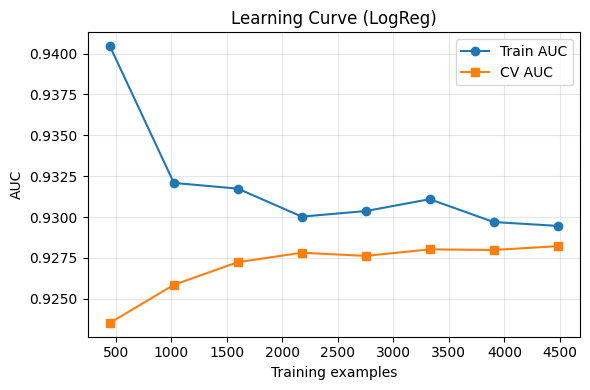

In [55]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    estimator=logreg,
    X=X_train, y=y_train,
    cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1, shuffle=True, random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, marker='o', label='Train AUC')
plt.plot(train_sizes, val_mean,   marker='s', label='CV AUC')
plt.xlabel("Training examples"); plt.ylabel("AUC"); plt.title("Learning Curve (LogReg)")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


In [56]:
# Detect duplicate feature rows with conflicting labels (leakage risk)
import pandas as pd

# Works if X_train is a DataFrame; if it's an array, wrap into DataFrame with columns
if not isinstance(X_train, pd.DataFrame):
    import numpy as np
    Xtr_df = pd.DataFrame(X_train, columns=[f"f{i}" for i in range(X_train.shape[1])])
else:
    Xtr_df = X_train.copy()

tmp = Xtr_df.copy()
tmp["__y__"] = y_train.values if hasattr(y_train, "values") else y_train
dups = tmp.groupby(list(Xtr_df.columns))["__y__"].nunique()
conflicts = dups[dups > 1]
print(f"Conflicting duplicates in train: {int((conflicts>0).sum())}")


Conflicting duplicates in train: 0


<Figure size 1000x1000 with 0 Axes>

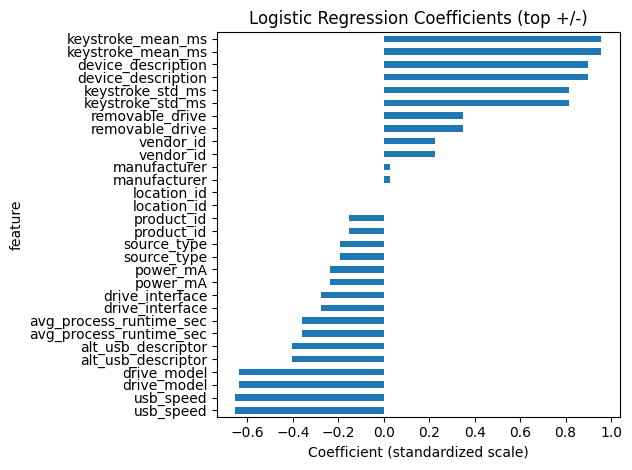


Top + features (push to malicious=1):
keystroke_mean_ms          0.957535
device_description         0.897516
keystroke_std_ms           0.814156
removable_drive            0.349587
vendor_id                  0.225055
manufacturer               0.027634
location_id                0.000026
product_id                -0.152320
source_type               -0.190406
power_mA                  -0.234516
drive_interface           -0.274020
avg_process_runtime_sec   -0.360796
alt_usb_descriptor        -0.403629
drive_model               -0.637595
usb_speed                 -0.652428
dtype: float64

Top - features (push to benign=0):
usb_speed                 -0.652428
drive_model               -0.637595
alt_usb_descriptor        -0.403629
avg_process_runtime_sec   -0.360796
drive_interface           -0.274020
power_mA                  -0.234516
source_type               -0.190406
product_id                -0.152320
location_id                0.000026
manufacturer               0.027634
vendor_id 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names
if hasattr(X_train, "columns"):
    feat_names = np.array(X_train.columns)
else:
    feat_names = np.array([f"f{i}" for i in range(X_train.shape[1])])

coefs = logreg.coef_.ravel()  # shape (n_features,)

# Top positive pushes (toward label=1) and negative pushes (toward label=0)
k = 20  # top-k to show
top_pos_idx = np.argsort(coefs)[-k:][::-1]
top_neg_idx = np.argsort(coefs)[:k]

imp_df = pd.DataFrame({
    "feature": np.concatenate([feat_names[top_pos_idx], feat_names[top_neg_idx]]),
    "coef":    np.concatenate([coefs[top_pos_idx],      coefs[top_neg_idx]])
})

plt.figure(figsize=(10,10))
imp_df.sort_values("coef").plot(kind="barh", x="feature", y="coef", legend=False)
plt.title("Logistic Regression Coefficients (top +/-)")
plt.xlabel("Coefficient (standardized scale)"); plt.tight_layout(); plt.show()

print("\nTop + features (push to malicious=1):")
print(pd.Series(coefs[top_pos_idx], index=feat_names[top_pos_idx]))

print("\nTop - features (push to benign=0):")
print(pd.Series(coefs[top_neg_idx], index=feat_names[top_neg_idx]))



Permutation Importance (AUC drop):
drive_model                0.042680
alt_usb_descriptor         0.035547
usb_speed                  0.017460
keystroke_std_ms           0.012393
keystroke_mean_ms          0.009655
device_description         0.009407
vendor_id                  0.007827
avg_process_runtime_sec    0.005095
power_mA                   0.003383
product_id                 0.002707
removable_drive            0.001155
drive_interface            0.000874
source_type                0.000334
manufacturer               0.000333
location_id                0.000002
dtype: float64


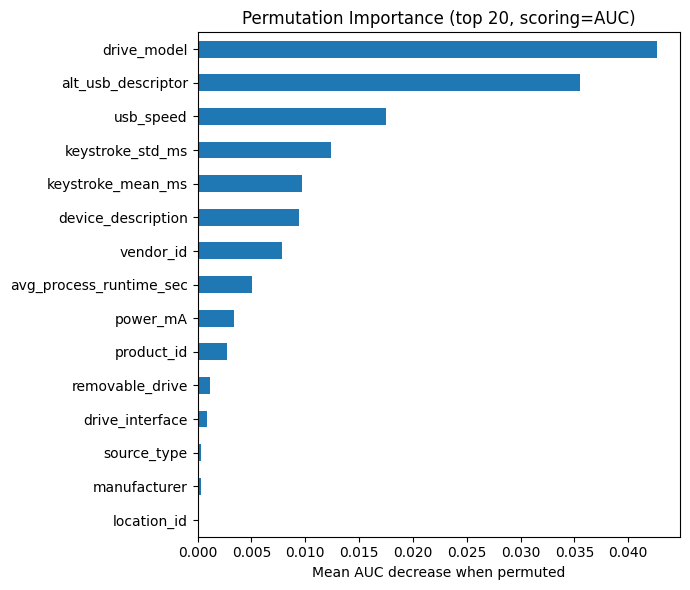

In [58]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    logreg, X_test, y_test,
    scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1
)

pi = pd.Series(result.importances_mean, index=feat_names).sort_values(ascending=False)

print("\nPermutation Importance (AUC drop):")
print(pi.head(25))

# Plot top 20
plt.figure(figsize=(7,6))
pi.head(20).sort_values().plot(kind="barh")
plt.title("Permutation Importance (top 20, scoring=AUC)")
plt.xlabel("Mean AUC decrease when permuted")
plt.tight_layout(); plt.show()


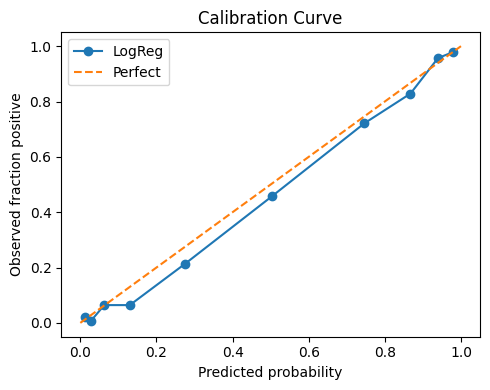

In [59]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='quantile')

plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', label='LogReg')
plt.plot([0,1],[0,1], '--', label='Perfect')
plt.xlabel("Predicted probability"); plt.ylabel("Observed fraction positive")
plt.title("Calibration Curve"); plt.legend(); plt.tight_layout(); plt.show()


# SVM

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# SVM with RBF kernel
svm_clf = SVC(
    kernel='rbf',
    C=20,                 # try 0.1, 1, 10 for tuning
    gamma='scale',         # 'auto' or specific value for tuning
    probability=True,      # needed for ROC-AUC
    class_weight='balanced',  # handles class imbalance
    random_state=42
)

# Train
svm_clf.fit(X_train, y_train)

# Predict
y_pred  = svm_clf.predict(X_test)
y_proba = svm_clf.predict_proba(X_test)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"SVM (RBF) — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))


SVM (RBF) — Accuracy: 0.8486
Precision: 0.7979, Recall: 0.8692, F1: 0.8320, ROC-AUC: 0.9187

Classification report:
               precision    recall  f1-score   support

           0     0.8935    0.8329    0.8622       796
           1     0.7979    0.8692    0.8320       604

    accuracy                         0.8486      1400
   macro avg     0.8457    0.8511    0.8471      1400
weighted avg     0.8523    0.8486    0.8492      1400



In [61]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Train-set metrics
y_pred_tr  = svm_clf.predict(X_train)
y_proba_tr = svm_clf.predict_proba(X_train)[:, 1]
acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average='binary', zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)
print(f"[Train] Acc={acc_tr:.4f} Prec={prec_tr:.4f} Rec={rec_tr:.4f} F1={f1_tr:.4f} AUC={auc_tr:.4f}")


[Train] Acc=0.8339 Prec=0.7778 Rec=0.8609 F1=0.8172 AUC=0.9090


In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(svm_clf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
cv_f1  = cross_val_score(svm_clf, X_train, y_train, scoring='f1',      cv=cv, n_jobs=-1)
print(f"CV AUC mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"CV  F1 mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")


CV AUC mean=0.9040 ± 0.0063
CV  F1 mean=0.8057 ± 0.0159


In [63]:
import pandas as pd, numpy as np
Xtr_df = X_train if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train)
tmp = Xtr_df.copy()
tmp['__y__'] = y_train.values if hasattr(y_train, 'values') else y_train
conflicts = tmp.groupby(list(Xtr_df.columns))['__y__'].nunique()
print("Conflicting duplicates (same features, different labels):", int((conflicts > 1).sum()))


Conflicting duplicates (same features, different labels): 0


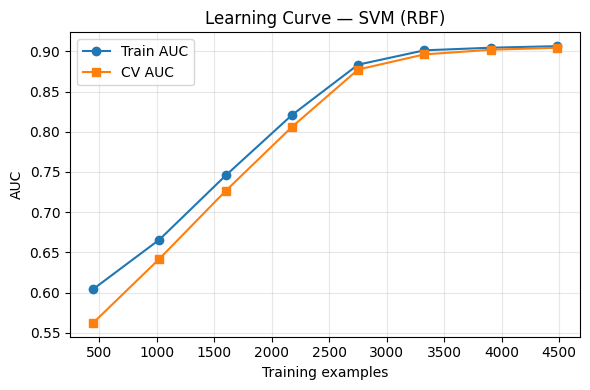

In [64]:
from sklearn.model_selection import learning_curve
import numpy as np, matplotlib.pyplot as plt

sizes, tr_scores, va_scores = learning_curve(
    estimator=svm_clf, X=X_train, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8), cv=5,
    scoring='roc_auc', n_jobs=-1, shuffle=True, random_state=42
)
plt.figure(figsize=(6,4))
plt.plot(sizes, tr_scores.mean(axis=1), marker='o', label='Train AUC')
plt.plot(sizes, va_scores.mean(axis=1), marker='s', label='CV AUC')
plt.xlabel('Training examples'); plt.ylabel('AUC'); plt.title('Learning Curve — SVM (RBF)')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


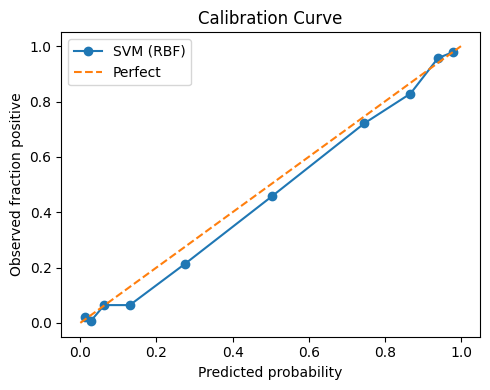

In [65]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='quantile')
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', label='SVM (RBF)')
plt.plot([0,1],[0,1],'--',label='Perfect')
plt.xlabel('Predicted probability'); plt.ylabel('Observed fraction positive')
plt.title('Calibration Curve'); plt.legend(); plt.tight_layout(); plt.show()



Top 20 features by permutation importance (AUC decrease):
alt_usb_descriptor         0.084615
vendor_id                  0.048145
drive_model                0.040623
product_id                 0.010782
usb_speed                  0.009467
avg_process_runtime_sec    0.006877
power_mA                   0.006875
keystroke_std_ms           0.004520
location_id                0.001848
keystroke_mean_ms          0.001665
device_description         0.000349
drive_interface            0.000321
source_type                0.000298
manufacturer               0.000275
removable_drive            0.000258
dtype: float64


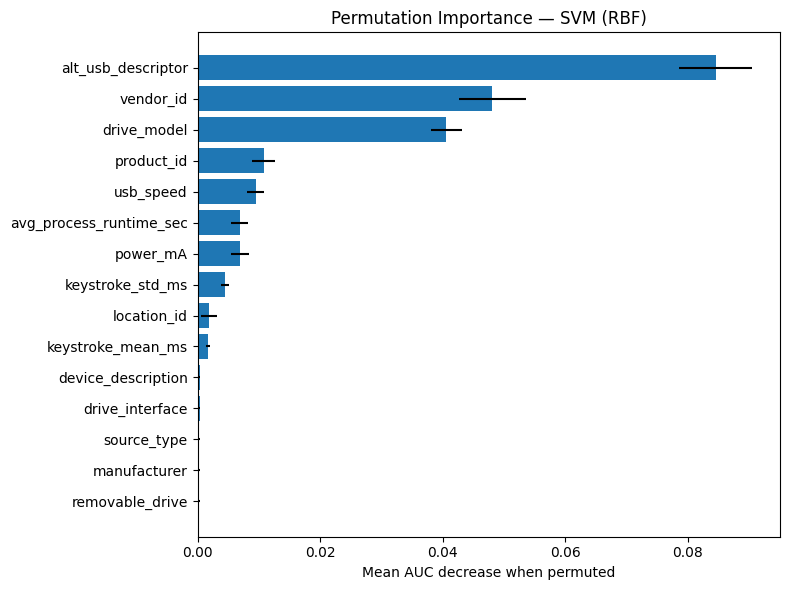

In [66]:
from sklearn.inspection import permutation_importance
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# Feature names
if hasattr(X_test, "columns"):
    feat_names = np.array(X_test.columns)
else:
    feat_names = np.array([f"f{i}" for i in range(X_test.shape[1])])

pi = permutation_importance(
    svm_clf, X_test, y_test,
    scoring='roc_auc', n_repeats=15, random_state=42, n_jobs=-1
)

imp = pd.Series(pi.importances_mean, index=feat_names).sort_values(ascending=False)
imp_std = pd.Series(pi.importances_std, index=feat_names).reindex(imp.index)

print("\nTop 20 features by permutation importance (AUC decrease):")
print(imp.head(20))

# Plot top 20 with error bars
topk = 20
plt.figure(figsize=(8,6))
plt.barh(imp.head(topk).index[::-1], imp.head(topk).values[::-1],
         xerr=imp_std.head(topk).values[::-1])
plt.xlabel('Mean AUC decrease when permuted')
plt.title('Permutation Importance — SVM (RBF)')
plt.tight_layout(); plt.show()


# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# Define KNN model
knn = KNeighborsClassifier(
    n_neighbors=15,      # you can tune: 5, 11, 15, 21
    weights='distance',  # 'uniform' or 'distance'
    metric='minkowski',  # Euclidean distance (p=2)
    p=1,
    n_jobs=-1
)

# Train
knn.fit(X_train, y_train)

# Predict
y_pred  = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"KNN — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


KNN — Accuracy: 0.8543
Precision: 0.8344, Recall: 0.8262, F1: 0.8303, ROC-AUC: 0.9226

Classification Report:
               precision    recall  f1-score   support

           0     0.8691    0.8756    0.8723       796
           1     0.8344    0.8262    0.8303       604

    accuracy                         0.8543      1400
   macro avg     0.8518    0.8509    0.8513      1400
weighted avg     0.8541    0.8543    0.8542      1400



[Train] Acc=1.0000 Prec=1.0000 Rec=1.0000 F1=1.0000 AUC=1.0000
[CV@train] AUC mean=0.9110 ± 0.0080
[CV@train]  F1 mean=0.8034 ± 0.0134


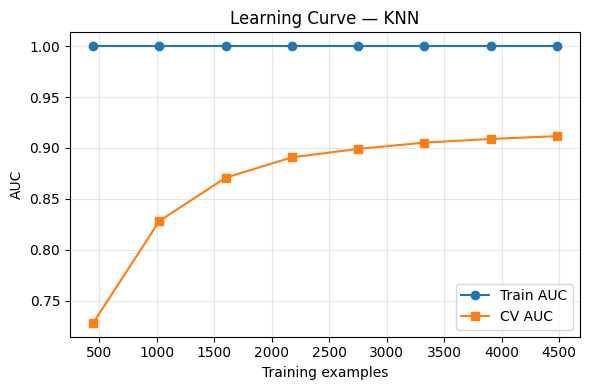

[Train, self-excluded] Majority-vote accuracy ≈ 0.8325  (lower than [Train] if memorizing)


In [67]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, LeaveOneOut
import numpy as np
import matplotlib.pyplot as plt

# 1) Train vs Test (note: KNN can look optimistic on train because a point is its own neighbor)
y_pred_tr  = knn.predict(X_train)
y_proba_tr = knn.predict_proba(X_train)[:, 1]
acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average='binary', zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)
print(f"[Train] Acc={acc_tr:.4f} Prec={prec_tr:.4f} Rec={rec_tr:.4f} F1={f1_tr:.4f} AUC={auc_tr:.4f}")

# 2) Stratified 5-Fold CV on TRAIN (expected generalization)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(knn, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
cv_f1  = cross_val_score(knn, X_train, y_train, scoring='f1',      cv=cv, n_jobs=-1)
print(f"[CV@train] AUC mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"[CV@train]  F1 mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# 3) (Optional) Leave-One-Out CV = memorization stress test (can be slow on large data)
# loo = LeaveOneOut()
# loo_auc = cross_val_score(knn, X_train, y_train, scoring='roc_auc', cv=loo, n_jobs=-1)
# print(f"[LOOCV] AUC mean={loo_auc.mean():.4f}")

# 4) Learning curve (do we benefit from more data?)
sizes, tr_scores, va_scores = learning_curve(
    estimator=knn, X=X_train, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8), cv=5,
    scoring='roc_auc', n_jobs=-1, shuffle=True, random_state=42
)
plt.figure(figsize=(6,4))
plt.plot(sizes, tr_scores.mean(axis=1), marker='o', label='Train AUC')
plt.plot(sizes, va_scores.mean(axis=1), marker='s', label='CV AUC')
plt.xlabel('Training examples'); plt.ylabel('AUC'); plt.title('Learning Curve — KNN')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# 5) Neighbor diagnostics (exclude self-neighbor to gauge “true” fit on train)
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=knn.n_neighbors+1, metric=knn.metric, p=getattr(knn, "p", 2)).fit(X_train)
dists, idxs = nbrs.kneighbors(X_train)
# drop self (position 0)
idxs_no_self = idxs[:, 1:]
# majority vote of neighbors' labels
y_train_arr = np.array(y_train)
maj_votes = (y_train_arr[idxs_no_self].mean(axis=1) >= 0.5).astype(int)
acc_loocv_like = (maj_votes == y_train_arr).mean()
print(f"[Train, self-excluded] Majority-vote accuracy ≈ {acc_loocv_like:.4f}  (lower than [Train] if memorizing)")



Top 20 features by permutation importance (AUC decrease):
alt_usb_descriptor         0.023677
vendor_id                  0.021382
drive_model                0.013804
product_id                 0.013539
usb_speed                  0.009935
power_mA                   0.006732
avg_process_runtime_sec    0.006596
keystroke_std_ms           0.005542
keystroke_mean_ms          0.004967
manufacturer               0.001737
source_type                0.001519
drive_interface            0.001230
removable_drive            0.001228
device_description         0.001032
location_id               -0.001209
dtype: float64


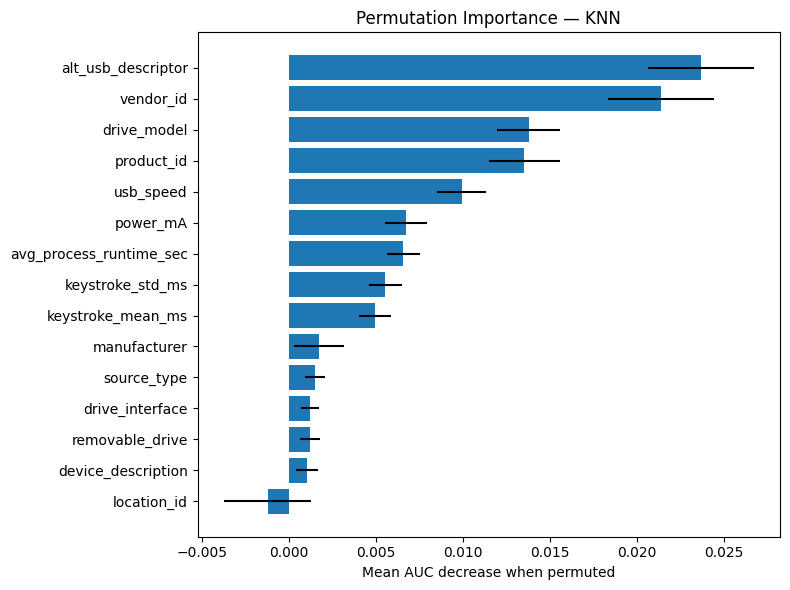

In [68]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Feature names
if hasattr(X_test, "columns"):
    feat_names = np.array(X_test.columns)
else:
    feat_names = np.array([f"f{i}" for i in range(X_test.shape[1])])

pi = permutation_importance(
    knn, X_test, y_test,
    scoring='roc_auc', n_repeats=15, random_state=42, n_jobs=-1
)

imp = pd.Series(pi.importances_mean, index=feat_names).sort_values(ascending=False)
imp_std = pd.Series(pi.importances_std, index=feat_names).reindex(imp.index)

print("\nTop 20 features by permutation importance (AUC decrease):")
print(imp.head(20))

# Plot top-20 with error bars
topk = 20
plt.figure(figsize=(8,6))
plt.barh(imp.head(topk).index[::-1], imp.head(topk).values[::-1],
         xerr=imp_std.head(topk).values[::-1])
plt.xlabel('Mean AUC decrease when permuted')
plt.title('Permutation Importance — KNN')
plt.tight_layout(); plt.show()


# XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBoost — Accuracy: 0.8829
Precision: 0.8459, Recall: 0.8907, F1: 0.8677, ROC-AUC: 0.9522

Classification Report:
               precision    recall  f1-score   support

           0     0.9136    0.8769    0.8949       796
           1     0.8459    0.8907    0.8677       604

    accuracy                         0.8829      1400
   macro avg     0.8798    0.8838    0.8813      1400
weighted avg     0.8844    0.8829    0.8832      1400


Top 20 features by gain:
                     feature       gain
10              drive_model  49.899990
1                 vendor_id  16.713322
14         keystroke_std_ms  12.982978
8        alt_usb_descriptor  11.994748
2                product_id   9.878829
11          drive_interface   6.942059
9               source_type   6.902744
0        device_description   6.488017
5                 usb_speed   5.072271
13        keystroke_mean_ms   4.362813
7   avg_process_runtime_sec   3.640873
6                  power_mA   3.259894
12          removable_dr

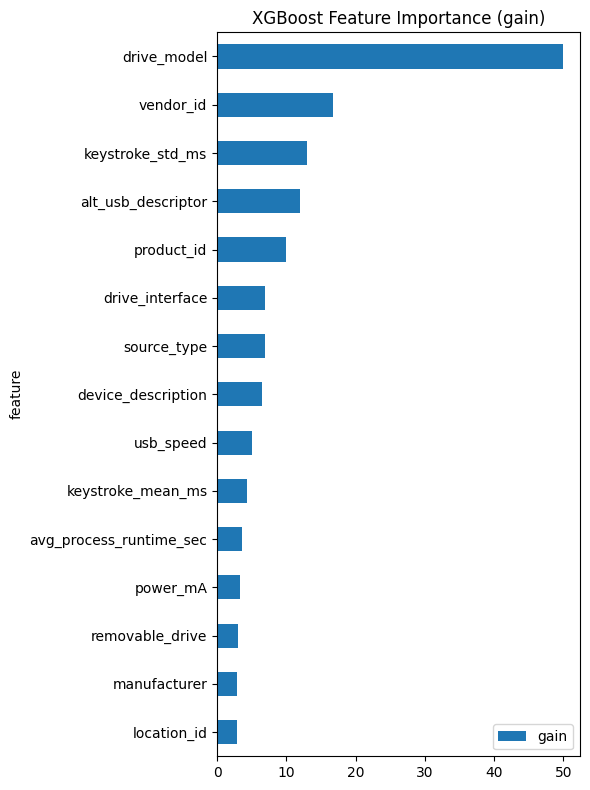

In [42]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

# --- If your data is imbalanced, set scale_pos_weight = neg/pos ---
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / max(pos, 1)

# --- Model ---
xgb = XGBClassifier(
    n_estimators=2000,          # large; we'll stop early
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.0,
    reg_alpha=0.0,
    reg_lambda=1.0,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",         # fast on CPU; use "gpu_hist" if GPU available
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

# --- Train with early stopping (uses test as validation; if you have X_val, use that instead) ---
xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False,
    early_stopping_rounds=100
)

# --- Predict ---
y_pred  = xgb.predict(x_test := X_test)
y_proba = xgb.predict_proba(x_test)[:, 1]

# --- Metrics (same style as your KNN) ---
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"XGBoost — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# --- Optional: quick feature importance (gain) ---
try:
    import pandas as pd
    import matplotlib.pyplot as plt

    if hasattr(X_train, "columns"):
        feat_names = X_train.columns
    else:
        feat_names = [f"f{i}" for i in range(X_train.shape[1])]

    booster = xgb.get_booster()
    scores = booster.get_score(importance_type="gain")
    imp_df = pd.DataFrame(
        [(feat_names[int(k[1:])], v) if k.startswith("f") else (k, v) for k, v in scores.items()],
        columns=["feature", "gain"]
    ).sort_values("gain", ascending=False)

    print("\nTop 20 features by gain:\n", imp_df.head(20))

    # Plot (optional)
    imp_df.head(20).plot(kind="barh", x="feature", y="gain", figsize=(6,8))
    plt.gca().invert_yaxis()
    plt.title("XGBoost Feature Importance (gain)")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Skipped importance plot:", e)


In [70]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Train metrics
y_pred_tr  = xgb.predict(X_train)
y_proba_tr = xgb.predict_proba(X_train)[:, 1]

acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average='binary', zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)

print(f"[Train] Acc={acc_tr:.4f} Prec={prec_tr:.4f} Rec={rec_tr:.4f} F1={f1_tr:.4f} AUC={auc_tr:.4f}")


[Train] Acc=0.9189 Prec=0.8859 Rec=0.9321 F1=0.9084 AUC=0.9783


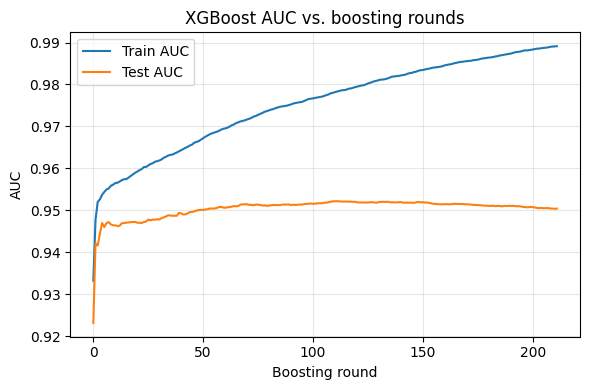

Best iteration: 111
Best test AUC at best_iteration: 0.9521593896635495


In [71]:
import matplotlib.pyplot as plt
evals = xgb.evals_result()  # from your .fit(eval_set=[...])
train_auc = evals['validation_0']['auc']
test_auc  = evals['validation_1']['auc']

plt.figure(figsize=(6,4))
plt.plot(train_auc, label='Train AUC')
plt.plot(test_auc,  label='Test AUC')
plt.xlabel('Boosting round'); plt.ylabel('AUC')
plt.title('XGBoost AUC vs. boosting rounds')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

print("Best iteration:", xgb.best_iteration)
print("Best test AUC at best_iteration:", test_auc[xgb.best_iteration])


In [72]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
cv_f1  = cross_val_score(xgb, X_train, y_train, scoring='f1',      cv=cv, n_jobs=-1)
print(f"[CV] AUC mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"[CV]  F1 mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")


[CV] AUC mean=0.9311 ± 0.0033
[CV]  F1 mean=0.8367 ± 0.0071


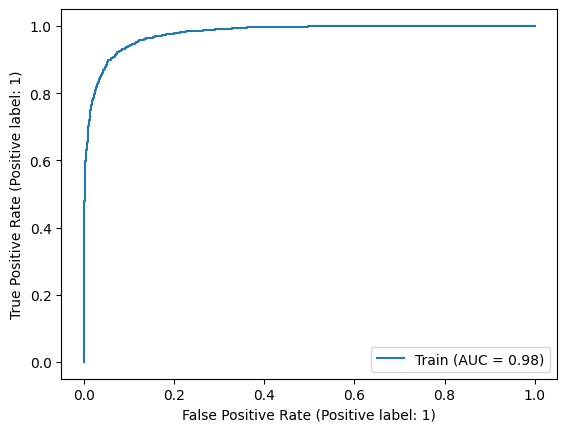

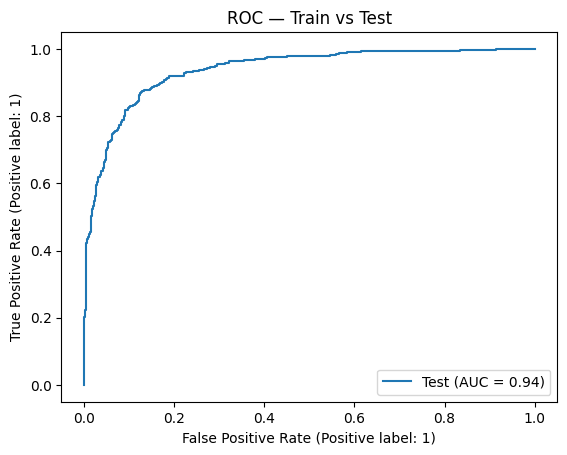

In [73]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_train, y_proba_tr, name='Train')
RocCurveDisplay.from_predictions(y_test,  y_proba,    name='Test')
plt.title('ROC — Train vs Test')
plt.show()


In [74]:
import pandas as pd, numpy as np
Xtr_df = X_train if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train)
tmp = Xtr_df.copy()
tmp['__y__'] = y_train.values if hasattr(y_train,'values') else y_train
conflicts = tmp.groupby(list(Xtr_df.columns))['__y__'].nunique()
print("Conflicting duplicates in train:", int((conflicts > 1).sum()))


Conflicting duplicates in train: 0


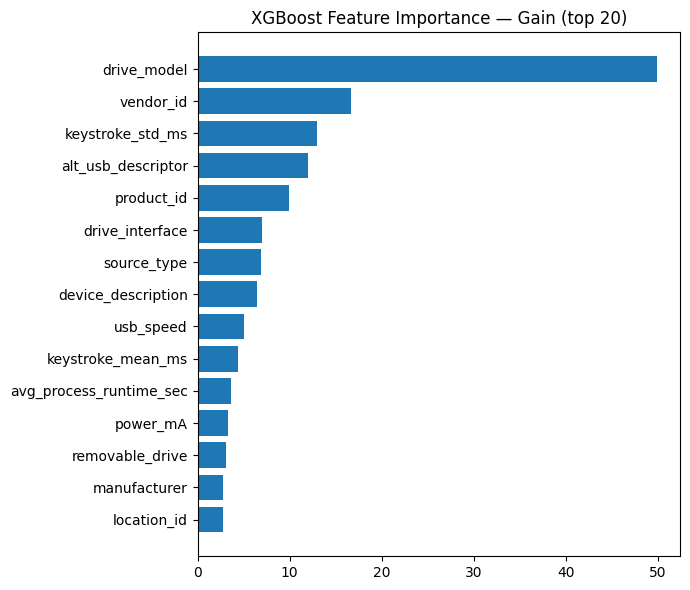


Top 20 (gain):
                     feature       gain
10              drive_model  49.899990
1                 vendor_id  16.713322
14         keystroke_std_ms  12.982978
8        alt_usb_descriptor  11.994748
2                product_id   9.878829
11          drive_interface   6.942059
9               source_type   6.902744
0        device_description   6.488017
5                 usb_speed   5.072271
13        keystroke_mean_ms   4.362813
7   avg_process_runtime_sec   3.640873
6                  power_mA   3.259894
12          removable_drive   3.038783
3              manufacturer   2.807384
4               location_id   2.794721


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Map booster feature names to your column names if available
if hasattr(xgb, "feature_names_in_"):
    feat_names = np.array(list(xgb.feature_names_in_))
else:
    feat_names = np.array([f"f{i}" for i in range(X_train.shape[1])])

booster = xgb.get_booster()

def imp_df(importance_type="gain"):
    raw = booster.get_score(importance_type=importance_type)  # dict { 'f12': score, ... }
    rows = []
    for k, v in raw.items():
        try:
            idx = int(k[1:]) if k.startswith("f") else None
            name = feat_names[idx] if idx is not None and idx < len(feat_names) else k
        except:
            name = k
        rows.append((name, v))
    df = pd.DataFrame(rows, columns=["feature", importance_type]).sort_values(importance_type, ascending=False)
    return df

gain_df  = imp_df("gain")
cover_df = imp_df("cover")
weight_df= imp_df("weight")

# Plot top-20 by gain
top = gain_df.head(20)
plt.figure(figsize=(7,6))
plt.barh(top["feature"][::-1], top["gain"][::-1])
plt.title("XGBoost Feature Importance — Gain (top 20)")
plt.tight_layout(); plt.show()

print("\nTop 20 (gain):\n", top)



Permutation importance (top 20):
 drive_model                0.019518
keystroke_std_ms           0.016100
alt_usb_descriptor         0.010282
vendor_id                  0.009203
product_id                 0.008309
avg_process_runtime_sec    0.006616
keystroke_mean_ms          0.005135
usb_speed                  0.003143
power_mA                   0.002655
drive_interface            0.001700
source_type                0.000979
location_id                0.000614
manufacturer               0.000423
device_description         0.000218
removable_drive           -0.000002
dtype: float64


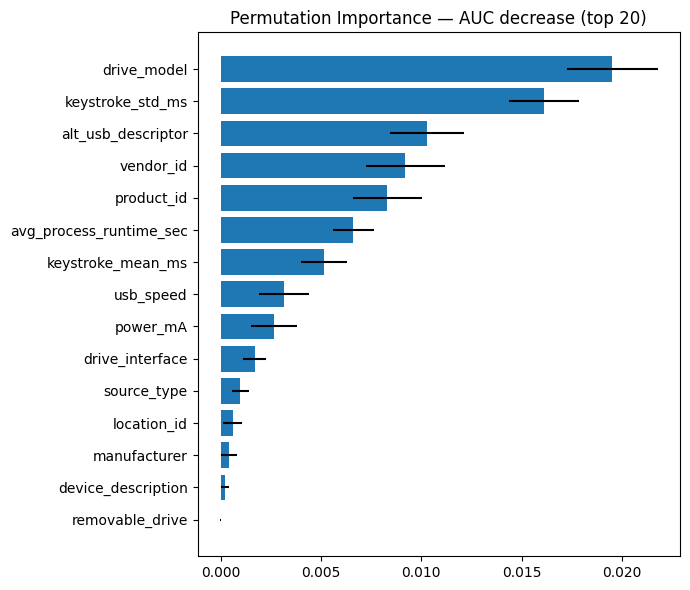

In [77]:
from sklearn.inspection import permutation_importance

# Ensure feature names
if hasattr(X_test, "columns"):
    feat_names_pi = np.array(X_test.columns)
else:
    feat_names_pi = np.array([f"f{i}" for i in range(X_test.shape[1])])

pi = permutation_importance(
    xgb, X_test, y_test,
    scoring="roc_auc", n_repeats=15, random_state=42, n_jobs=-1
)

pi_mean = pd.Series(pi.importances_mean, index=feat_names_pi).sort_values(ascending=False)
pi_std  = pd.Series(pi.importances_std,  index=feat_names_pi).reindex(pi_mean.index)

print("\nPermutation importance (top 20):\n", pi_mean.head(20))

plt.figure(figsize=(7,6))
plt.barh(pi_mean.head(20).index[::-1], pi_mean.head(20).values[::-1],
         xerr=pi_std.head(20).values[::-1])
plt.title("Permutation Importance — AUC decrease (top 20)")
plt.tight_layout(); plt.show()


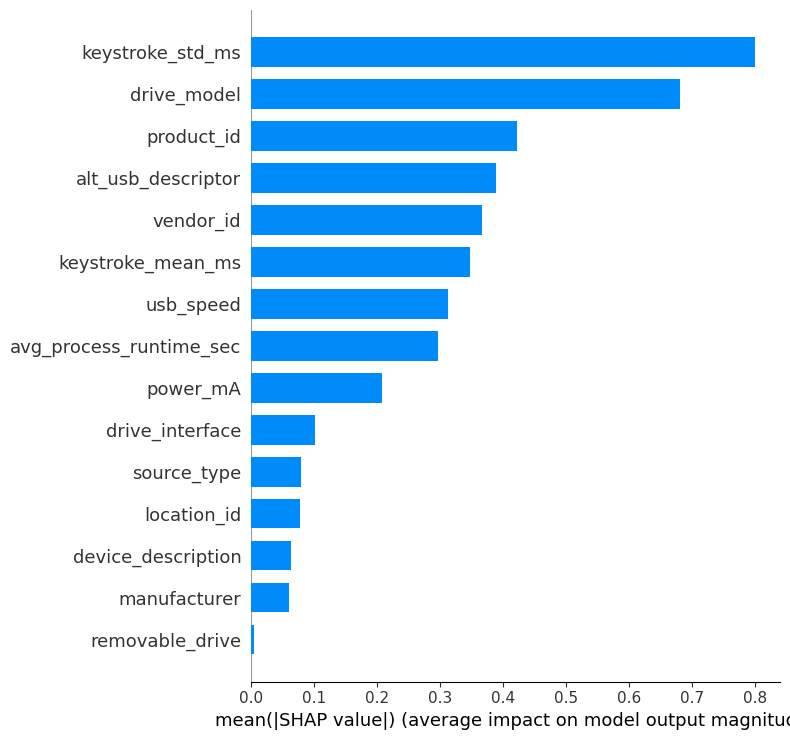

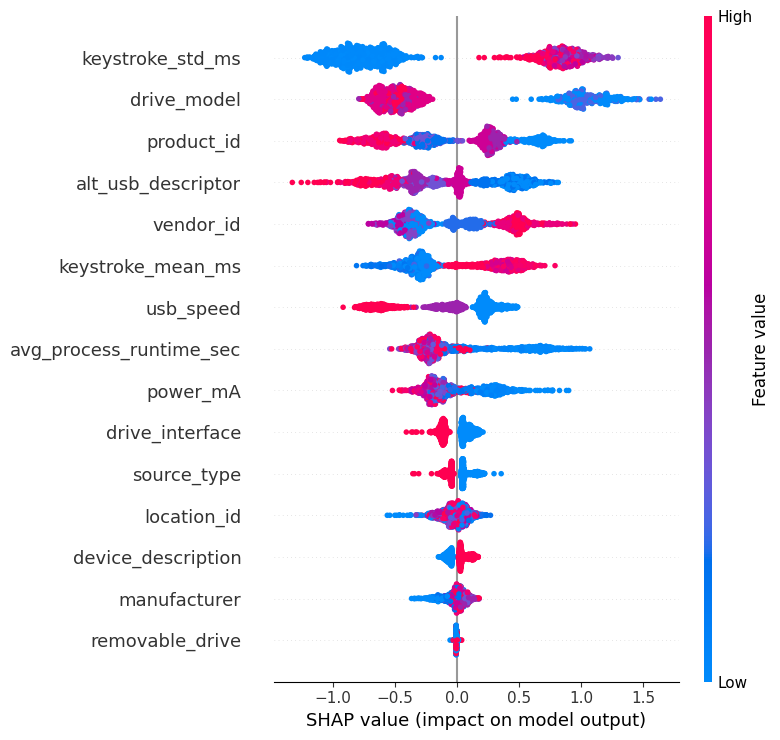

In [78]:
# pip install shap  # if not installed
import shap
explainer = shap.TreeExplainer(xgb)
# Use a small background for speed if needed
bg = X_train[:100] if hasattr(X_train, "__getitem__") else X_train
shap_values = explainer.shap_values(X_test)

# Global importance
shap.summary_plot(shap_values, X_test, feature_names=getattr(X_test, "columns", None), plot_type='bar')
# Detailed summary (beeswarm)
shap.summary_plot(shap_values, X_test, feature_names=getattr(X_test, "columns", None))


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report
import numpy as np

# --- Model (regularized to reduce overfitting) ---
dt = DecisionTreeClassifier(
    criterion="gini",          # or "entropy", "log_loss"
    max_depth=8,               # tune: 4–12
    min_samples_split=60,      # tune: 10–100
    min_samples_leaf=20,       # tune: 5–50
    max_features=None,         # or "sqrt"/"log2"
    class_weight="balanced",   # handles imbalance
    random_state=42
)

# --- Train ---
dt.fit(X_train, y_train)

# --- Predict ---
y_pred  = dt.predict(X_test)
# Probability for ROC-AUC
y_proba = dt.predict_proba(X_test)[:, 1] if hasattr(dt, "predict_proba") else np.zeros_like(y_pred, dtype=float)

# --- Metrics (same style as you used) ---
acc  = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"DecisionTree — Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# --- Quick feature importances ---
try:
    import pandas as pd
    if hasattr(X_train, "columns"):
        feat_names = X_train.columns
    else:
        feat_names = [f"f{i}" for i in range(X_train.shape[1])]
    importances = pd.Series(dt.feature_importances_, index=feat_names).sort_values(ascending=False)
    print("\nTop 20 features:\n", importances.head(20))
except Exception as e:
    print("Skipped importance print:", e)

# --- Optional: human-readable rules (truncated) ---
try:
    rules = export_text(dt, feature_names=list(feat_names))
    print("\nTree rules (first 2000 chars):\n", rules[:2000])
except Exception:
    pass


DecisionTree — Accuracy: 0.8650
Precision: 0.8396, Recall: 0.8493, F1: 0.8444, ROC-AUC: 0.9318

Classification Report:
               precision    recall  f1-score   support

           0     0.8847    0.8769    0.8808       796
           1     0.8396    0.8493    0.8444       604

    accuracy                         0.8650      1400
   macro avg     0.8621    0.8631    0.8626      1400
weighted avg     0.8652    0.8650    0.8651      1400


Top 20 features:
 keystroke_std_ms           0.468268
drive_model                0.226838
product_id                 0.087754
alt_usb_descriptor         0.080610
vendor_id                  0.059291
avg_process_runtime_sec    0.029636
keystroke_mean_ms          0.018706
power_mA                   0.011938
usb_speed                  0.009541
location_id                0.004945
manufacturer               0.002474
device_description         0.000000
source_type                0.000000
drive_interface            0.000000
removable_drive            0.0

In [79]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

y_pred_tr  = dt.predict(X_train)
y_proba_tr = dt.predict_proba(X_train)[:, 1]

acc_tr  = accuracy_score(y_train, y_pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train, y_pred_tr, average="binary", zero_division=0)
auc_tr  = roc_auc_score(y_train, y_proba_tr)

print(f"[Train] Acc={acc_tr:.4f} Prec={prec_tr:.4f} Rec={rec_tr:.4f} F1={f1_tr:.4f} AUC={auc_tr:.4f}")


[Train] Acc=0.8768 Prec=0.8449 Rec=0.8749 F1=0.8596 AUC=0.9519


In [80]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(dt, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)
cv_f1  = cross_val_score(dt, X_train, y_train, scoring="f1",      cv=cv, n_jobs=-1)
print(f"[CV] AUC mean={cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
print(f"[CV]  F1 mean={cv_f1.mean():.4f} ± {cv_f1.std():.4f}")


[CV] AUC mean=0.9205 ± 0.0080
[CV]  F1 mean=0.8274 ± 0.0089


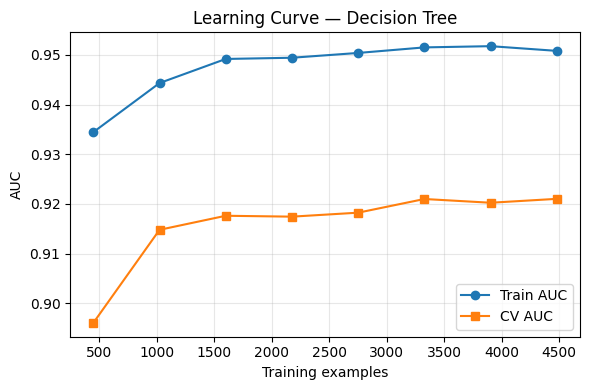

In [81]:
from sklearn.model_selection import learning_curve
import numpy as np, matplotlib.pyplot as plt

sizes, tr, va = learning_curve(dt, X_train, y_train,
                               train_sizes=np.linspace(0.1,1.0,8),
                               cv=5, scoring="roc_auc",
                               shuffle=True, random_state=42, n_jobs=-1)
plt.figure(figsize=(6,4))
plt.plot(sizes, tr.mean(axis=1), marker="o", label="Train AUC")
plt.plot(sizes, va.mean(axis=1), marker="s", label="CV AUC")
plt.xlabel("Training examples"); plt.ylabel("AUC")
plt.title("Learning Curve — Decision Tree")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


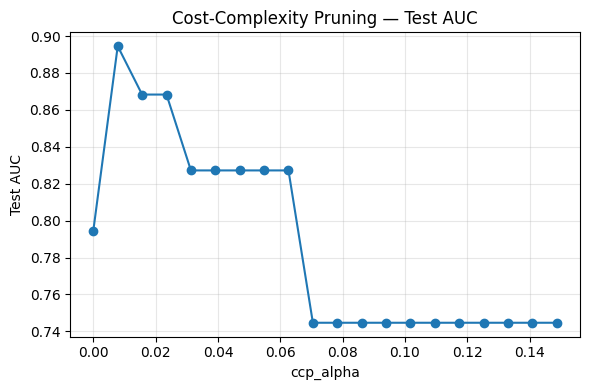

Best ccp_alpha ≈ 0.007828, best Test AUC=0.8945


In [82]:
import numpy as np, matplotlib.pyplot as plt
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

aucs = []
for a in np.linspace(ccp_alphas.min(), ccp_alphas.max(), 20):
    m = DecisionTreeClassifier(random_state=42, class_weight="balanced", ccp_alpha=a)
    m.fit(X_train, y_train)
    proba = m.predict_proba(X_test)[:,1]
    aucs.append(roc_auc_score(y_test, proba))

plt.figure(figsize=(6,4))
plt.plot(np.linspace(ccp_alphas.min(), ccp_alphas.max(), 20), aucs, marker="o")
plt.xlabel("ccp_alpha"); plt.ylabel("Test AUC")
plt.title("Cost-Complexity Pruning — Test AUC")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

best_alpha = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 20)[int(np.argmax(aucs))]
print(f"Best ccp_alpha ≈ {best_alpha:.6f}, best Test AUC={max(aucs):.4f}")


In [83]:
import pandas as pd, numpy as np
Xtr_df = X_train if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train)
tmp = Xtr_df.copy()
tmp["__y__"] = y_train.values if hasattr(y_train,"values") else y_train
conflicts = tmp.groupby(list(Xtr_df.columns))["__y__"].nunique()
print("Conflicting duplicates in train:", int((conflicts > 1).sum()))


Conflicting duplicates in train: 0


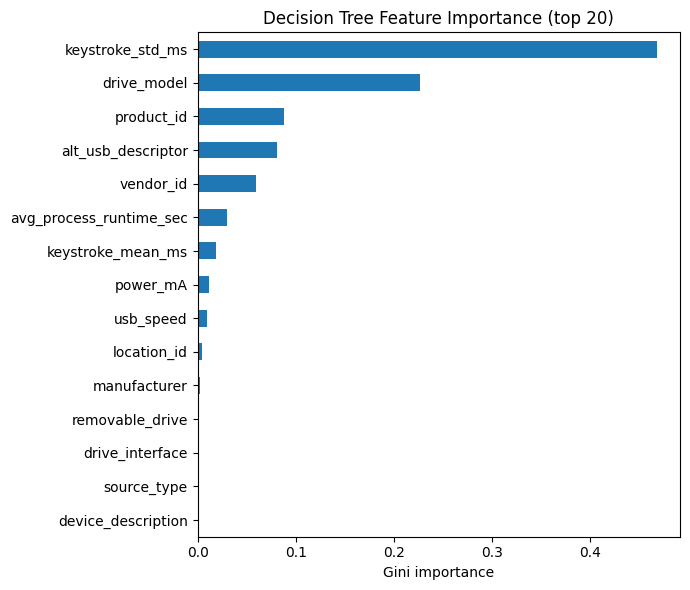


Top 20 features:
 keystroke_std_ms           0.468268
drive_model                0.226838
product_id                 0.087754
alt_usb_descriptor         0.080610
vendor_id                  0.059291
avg_process_runtime_sec    0.029636
keystroke_mean_ms          0.018706
power_mA                   0.011938
usb_speed                  0.009541
location_id                0.004945
manufacturer               0.002474
device_description         0.000000
source_type                0.000000
drive_interface            0.000000
removable_drive            0.000000
dtype: float64


In [84]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

feat_names = np.array(X_train.columns) if hasattr(X_train, "columns") \
             else np.array([f"f{i}" for i in range(X_train.shape[1])])

imp = pd.Series(dt.feature_importances_, index=feat_names).sort_values(ascending=False)

topk = 20
plt.figure(figsize=(7,6))
imp.head(topk).sort_values().plot(kind="barh")
plt.xlabel("Gini importance"); plt.title("Decision Tree Feature Importance (top 20)")
plt.tight_layout(); plt.show()

print("\nTop 20 features:\n", imp.head(topk))



Permutation Importance (top 20):
 drive_model                0.079212
keystroke_std_ms           0.038048
alt_usb_descriptor         0.029470
vendor_id                  0.026458
product_id                 0.020168
avg_process_runtime_sec    0.008769
keystroke_mean_ms          0.006319
usb_speed                  0.003651
power_mA                   0.003487
location_id                0.000725
device_description         0.000000
source_type                0.000000
drive_interface            0.000000
removable_drive            0.000000
manufacturer              -0.000901
dtype: float64


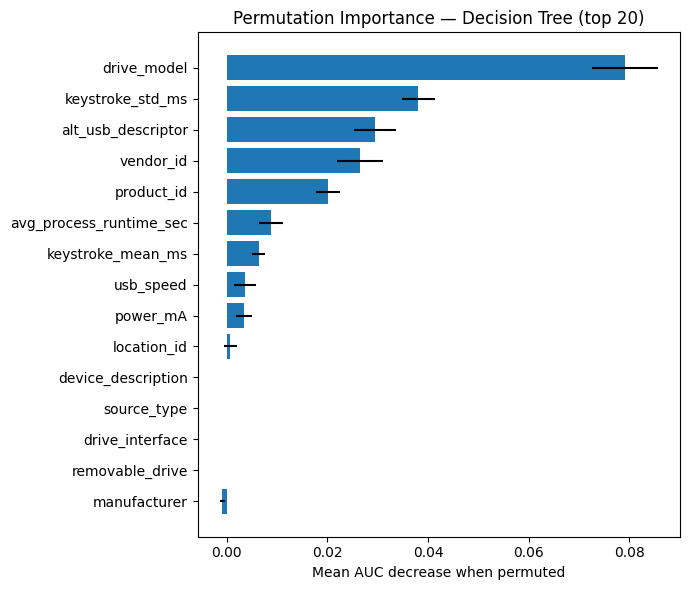

In [85]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(dt, X_test, y_test,
                            scoring="roc_auc", n_repeats=15,
                            random_state=42, n_jobs=-1)

pi_mean = pd.Series(pi.importances_mean, index=feat_names).sort_values(ascending=False)
pi_std  = pd.Series(pi.importances_std,  index=feat_names).reindex(pi_mean.index)

print("\nPermutation Importance (top 20):\n", pi_mean.head(20))

plt.figure(figsize=(7,6))
plt.barh(pi_mean.head(20).index[::-1], pi_mean.head(20).values[::-1],
         xerr=pi_std.head(20).values[::-1])
plt.xlabel("Mean AUC decrease when permuted")
plt.title("Permutation Importance — Decision Tree (top 20)")
plt.tight_layout(); plt.show()
